Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "all_data_of_clubs.xlsx"
df = pd.read_excel(file_path)
df.rename(columns={"Unnamed: 0": "Team"}, inplace=True)
print(df)

                       Team  Goals  Goals per match  Shots  Shots on target  \
0                   Arsenal     21             1.75    171               61   
1               Aston Villa     19             1.58    153               48   
2               Bournemouth     16             1.33    186               57   
3                 Brentford     22             1.83    132               61   
4    Brighton & Hove Albion     21             1.75    165               56   
5                   Chelsea     23             1.92    170               63   
6            Crystal Palace     10             0.83    171               60   
7                   Everton     10             0.83    158               48   
8                    Fulham     17             1.42    182               63   
9              Ipswich Town     12             1.09    108               33   
10           Leicester City     15             1.25    117               38   
11                Liverpool     21             1.91 

Processing Attacking

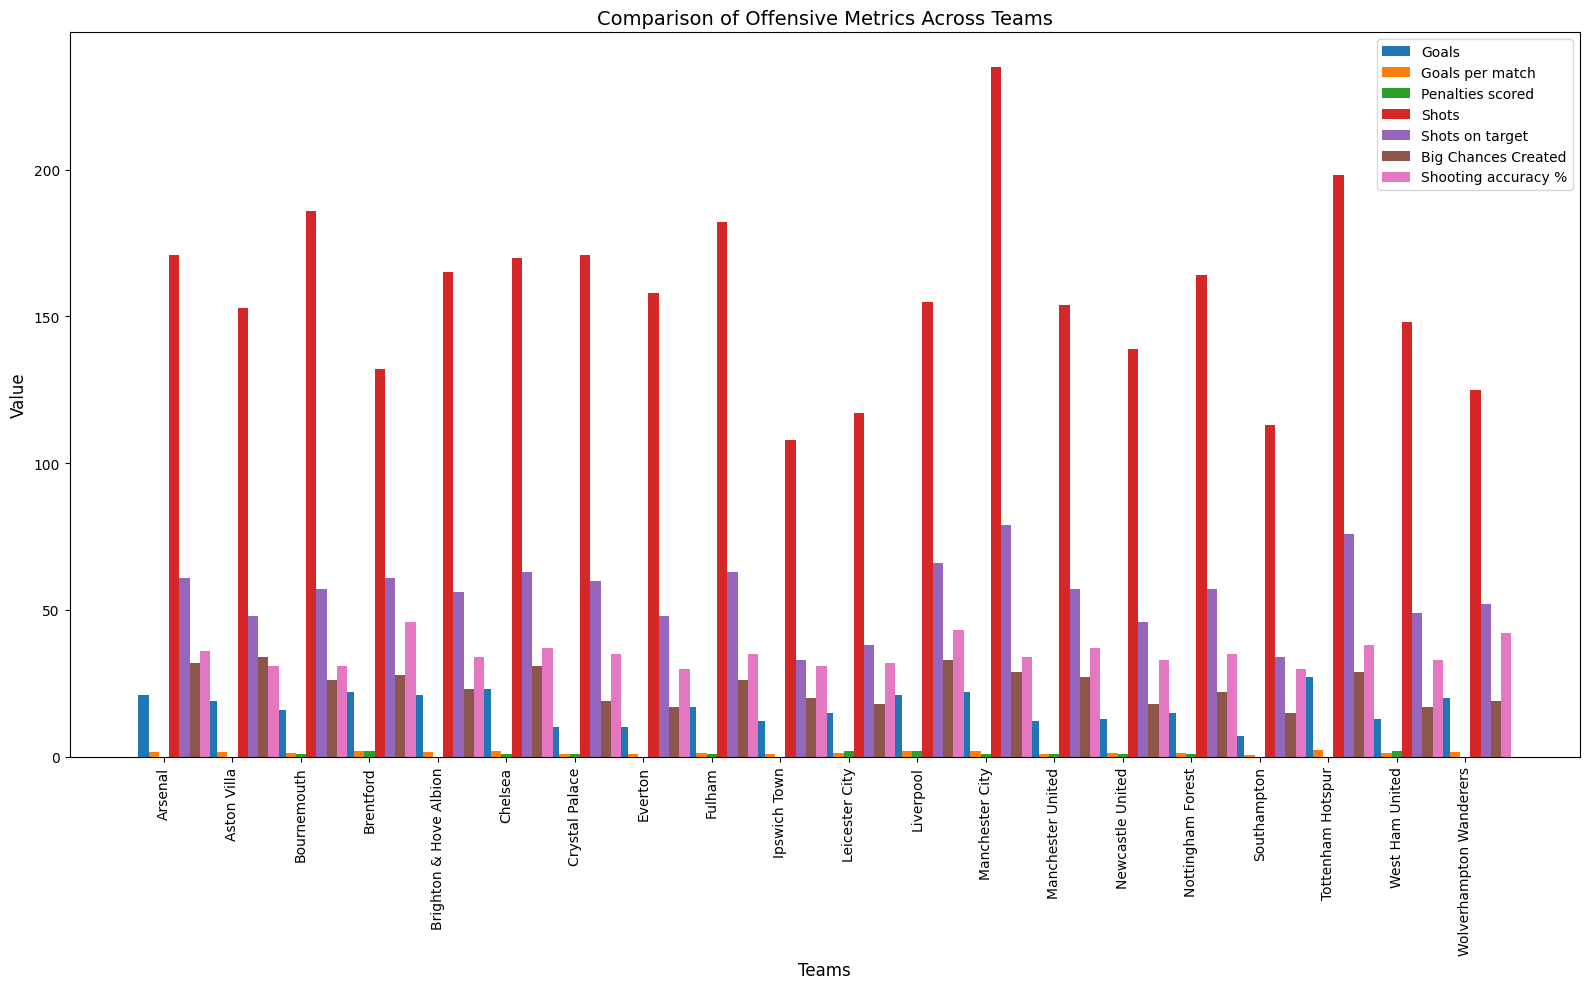

In [8]:
attacking_feature = ['Goals', 'Goals per match', 'Penalties scored', 'Shots', 'Shots on target', 'Big Chances Created', 'Shooting accuracy %']
attacking_data = pd.DataFrame(data=df[attacking_feature].values, index = df['Team'], columns=attacking_feature)
plt.figure(figsize=(16, 10))
bar_width = 0.15
x = np.arange(len(attacking_data.index))
for i, feature in enumerate(attacking_feature):
    plt.bar(x + i * bar_width, attacking_data[feature], bar_width, label=feature)
    
plt.title('Comparison of Offensive Metrics Across Teams', fontsize=14)
plt.xlabel('Teams', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.xticks(x + bar_width * 2, attacking_data.index, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

Processing Defense

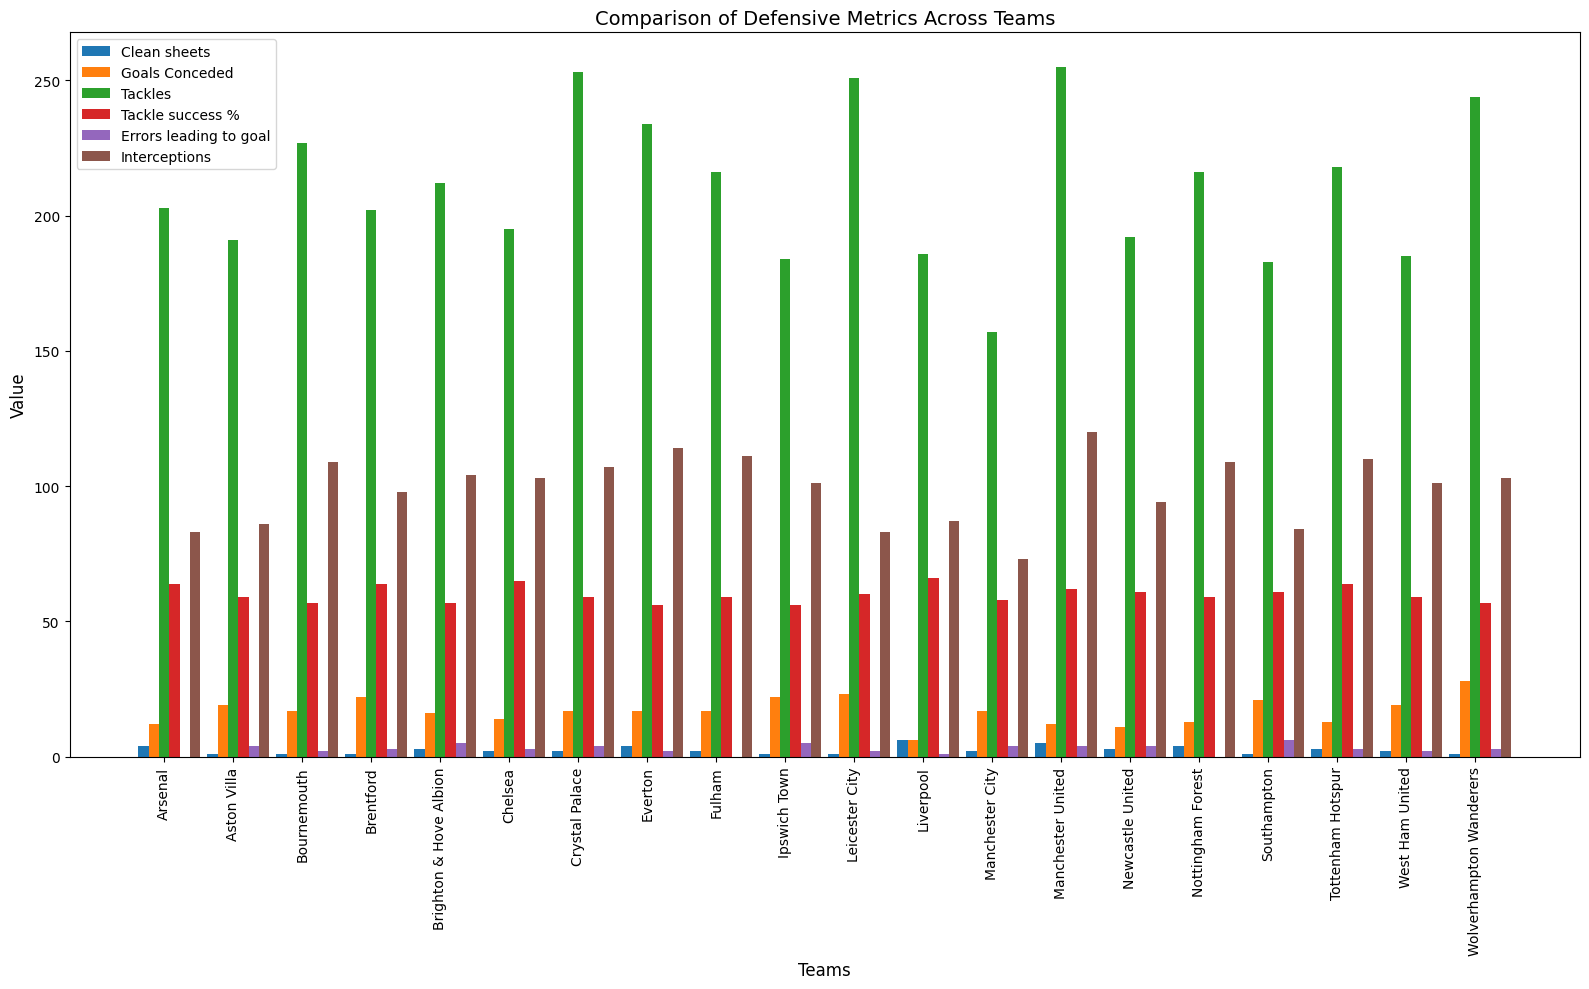

In [9]:
defense_features = ['Clean sheets', 'Goals Conceded', 'Tackles', 'Tackle success %', 'Errors leading to goal', 'Interceptions']
defense_data = pd.DataFrame(data=df[defense_features].values, columns=defense_features, index=df['Team'])
plt.figure(figsize=(16, 10))
bar_width = 0.15
x = np.arange(len(defense_data.index))
for i, feature in enumerate(defense_features):
    plt.bar(x + i * bar_width, defense_data[feature], bar_width, label=feature)
plt.title('Comparison of Defensive Metrics Across Teams', fontsize=14)
plt.xlabel('Teams', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.xticks(x + bar_width * 2, defense_data.index, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


Processing Control Features

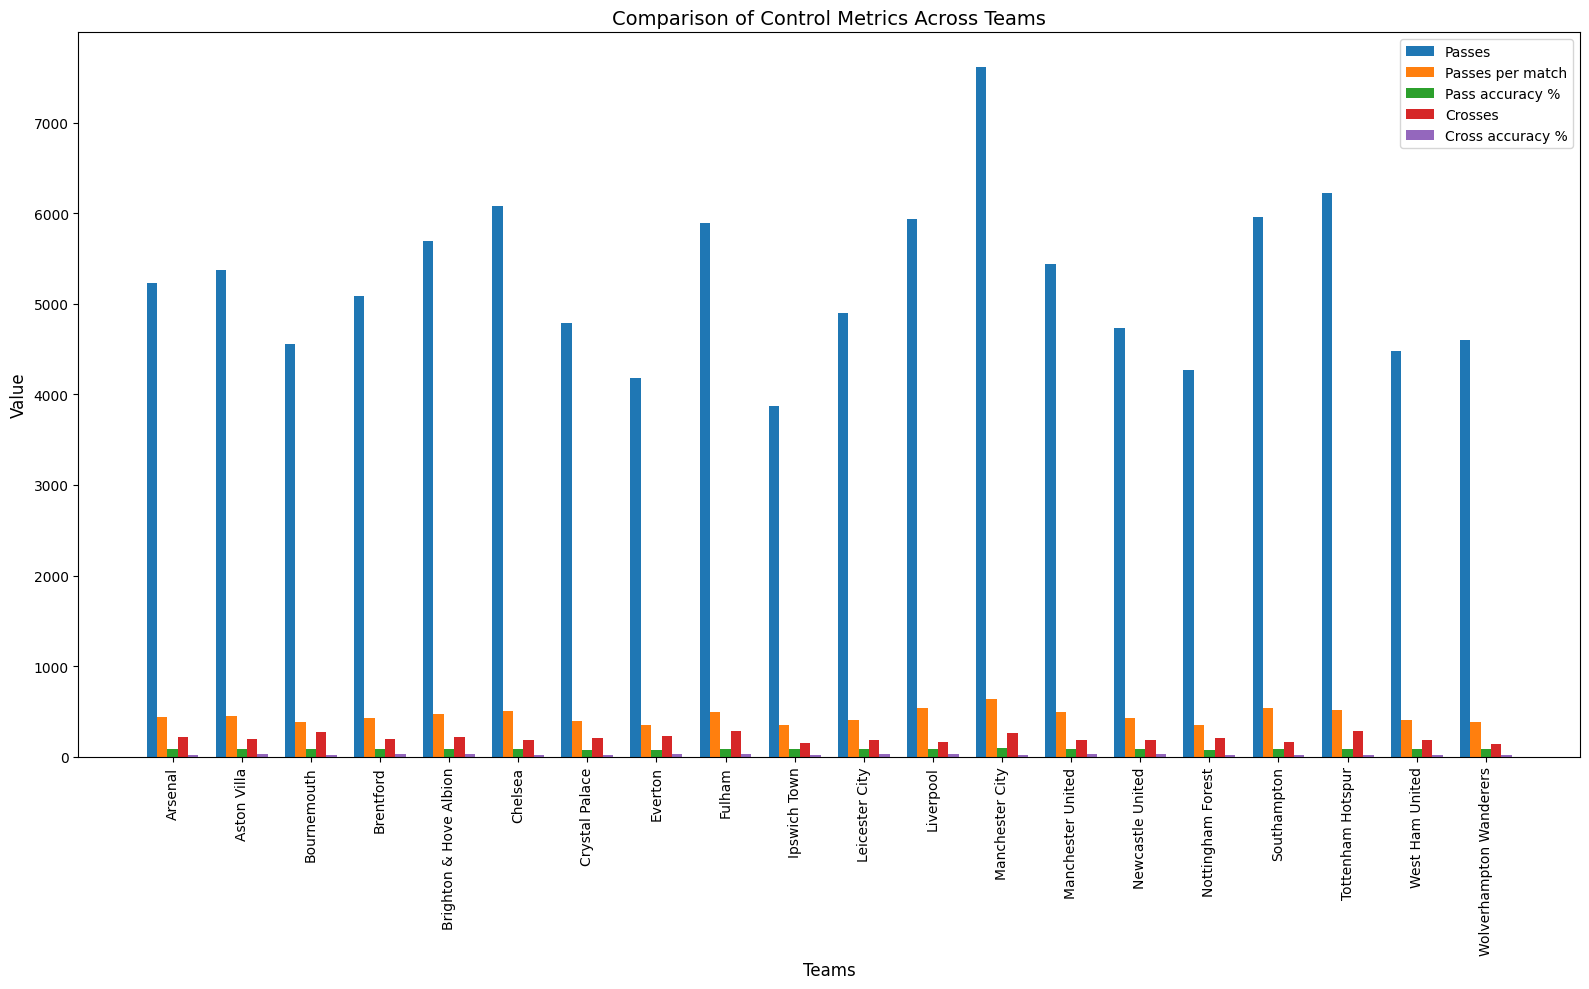

In [10]:
control_features = ['Passes', 'Passes per match', 'Pass accuracy %', 'Crosses', 'Cross accuracy %']
control_data = pd.DataFrame(data=df[control_features].values, index=df['Team'], columns=control_features)
plt.figure(figsize=(16, 10))
x = np.arange(len(control_data.index))
for i, feature in enumerate(control_features):
    plt.bar(x + i * bar_width, control_data[feature], bar_width, label=feature)
plt.title('Comparison of Control Metrics Across Teams', fontsize=14)
plt.xlabel('Teams', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.xticks(x + bar_width * 2, control_data.index, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()



Level of effectiveness

In [24]:
w1_attack, w2_attack, w3_attack, w4_attack, w5_attack = 0.4, 0.25, 0.2, 0.1, 0.05
df['Attacking Efficiency'] = (
    w1_attack * df['Goals'] + 
    w2_attack * df['Big Chances Created'] + 
    w3_attack * df['Shots on target'] + 
    w4_attack * df['Shooting accuracy %'] + 
    w5_attack * df['Hit woodwork']
)
w1_defense, w2_defense, w3_defense, w4_defense, w5_defense, w6_defense, w7_defense, w8_defense = 0.3, 0.25, 0.1, 0.1, 0.1, 0.1, 0.05, 0.2
df['Defensive Efficiency'] = (
    w1_defense * df['Clean sheets'] -
    w2_defense * df['Goals Conceded'] +
    w3_defense * df['Tackles'] +
    w4_defense * df['Interceptions'] +
    w5_defense * df['Blocked shots'] +
    w6_defense * df['Saves'] +
    w7_defense * df['Aerial Battles/Duels Won'] -
    w8_defense * df['Errors leading to goal']
)
w1_control, w2_control, w3_control, w4_control = 0.4, 0.3, 0.25, 0.05
df['Possession Efficiency'] = (
    w1_control * df['Pass accuracy %'] +
    w2_control * df['Passes'] +
    w3_control * df['Crosses'] +
    w4_control * df['Cross accuracy %']
)
print(df)


                       Team  Goals  Goals per match  Shots  Shots on target  \
0                   Arsenal     21             1.75    171               61   
1               Aston Villa     19             1.58    153               48   
2               Bournemouth     16             1.33    186               57   
3                 Brentford     22             1.83    132               61   
4    Brighton & Hove Albion     21             1.75    165               56   
5                   Chelsea     23             1.92    170               63   
6            Crystal Palace     10             0.83    171               60   
7                   Everton     10             0.83    158               48   
8                    Fulham     17             1.42    182               63   
9              Ipswich Town     12             1.09    108               33   
10           Leicester City     15             1.25    117               38   
11                Liverpool     21             1.91 